# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

In [2]:
import sys
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd
from cphmdanalysis import compute_pkas as pka
from cphmdanalysis import HH_fitting

# Data File

In [3]:
moon_file   = 'data/moon_1997_plmII_data.dat'

# Collect Data

In [4]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [float(dat) for dat in split_line]
                data.append(dat_list)
    return data

In [5]:
moon_data = data_collect(moon_file)

In [6]:
moon_data

[[3.0, 0.3239740820734198],
 [3.4943820224719095, 65.2267818574514],
 [3.7847882454624022, 96.43628509719223],
 [3.985306828003457, 96.65226781857451],
 [4.189282627484874, 98.0561555075594],
 [4.386343993085566, 99.89200863930886],
 [4.694036300777873, 85.09719222462203],
 [5.005185825410544, 73.97408207343412],
 [5.496110630942091, 43.9524838012959],
 [5.997407087294727, 26.88984881209504],
 [6.495246326707, 10.1511879049676],
 [6.999999999999998, -0.6479481641468681]]

# Plot Data Settings

## Colors

In [7]:
Color1 = ('#00FF17') # Green 
Color2 = ('#0069FF') # Blue
Color3 = ('#FF00E8') # Pink 
Color4 = ('#FF9700') # Orange 
Colors = [Color1, Color2, Color3, Color4]

## Global Settings

In [8]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [9]:
ink_x = 1.4 # 1.4
ink_y = 1.4 # 1.4

ink_markersize  = 2
ink_linewidth = 0.5

# Make Moon 1997 Data Remake

## Plot Moon Data

### Plot With Labels

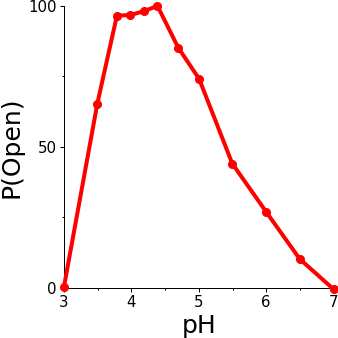

In [10]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in moon_data], [y[1] for y in moon_data], 'o-', color='Red', markersize=8, linewidth=4, clip_on=False, zorder=5)


# plot labels
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('P(Open)', fontsize=25)

# plot details
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 100)
axes.set_yticks([0, 50, 100])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(3, 7)
axes.set_xticks([3, 4, 5, 6, 7])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/2FE8_Triad_HBs_w_Labels.pdf")
plt.show()

### Plot without labels

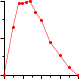

In [11]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points
axes.plot([x[0] for x in moon_data], [y[1] for y in moon_data], 'o-', color='Red', markersize=ink_markersize, linewidth=ink_linewidth, clip_on=False, zorder=5)

# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 100)
axes.set_yticks([0, 50, 100])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(3, 7)
axes.set_xticks([3, 4, 5, 6, 7])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)



fig.tight_layout()
plt.savefig("Moon_1997_Data.png", dpi=360, transparent=True)
plt.show()